In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
plt.rcParams['figure.figsize'] = 14,8
from statsmodels.tools.eval_measures import rmse

In [2]:
data= pd.read_excel("test_DataScience.xlsx")

In [3]:
data

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Bengaluru,NaN,NaN,56892,17178
1,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Hyderabad,NaN,NaN,41460,11916
2,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Dehradun,NaN,NaN,55561,19461
3,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Indore,NaN,NaN,320923,110667
4,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,NaN,NaN,220937,46033
...,...,...,...,...,...,...,...,...,...,...
2155,2022,Dec,Laptop_Website,New_Customer,Unidentified_Sources,Bengaluru,67299.0,21255.0,6984,1882
2156,2022,Dec,Laptop_Website,New_Customer,Unidentified_Sources,Hyderabad,430294.0,156510.0,46676,16703
2157,2022,Dec,Laptop_Website,New_Customer,Unidentified_Sources,Dehradun,48713.0,27770.0,7515,2089
2158,2022,Dec,Laptop_Website,New_Customer,Unidentified_Sources,Indore,593021.0,310836.0,161575,78465


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2160 non-null   int64  
 1   Month               2160 non-null   object 
 2   Laptop/Desktop      2160 non-null   object 
 3   Type_of_Customers?  2160 non-null   object 
 4   Coming from         2160 non-null   object 
 5   Place_in_India      2160 non-null   object 
 6   Level 1             1081 non-null   float64
 7   Level 2             1081 non-null   float64
 8   Level 3             2160 non-null   int64  
 9   Level 4             2160 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 168.9+ KB


In [5]:
def monthToNum(shortMonth):
    return {
            'Jan': 1,
            'Feb': 2,
            'Mar': 3,
            'Apr': 4,
            'May': 5,
            'Jun': 6,
            'Jul': 7,
            'Aug': 8,
            'Sep': 9, 
            'Oct': 10,
            'Nov': 11,
            'Dec': 12
    }[shortMonth]

In [6]:
data["Month"]=data["Month"].map(monthToNum)

In [7]:
data

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,1,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Bengaluru,NaN,NaN,56892,17178
1,2020,1,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Hyderabad,NaN,NaN,41460,11916
2,2020,1,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Dehradun,NaN,NaN,55561,19461
3,2020,1,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Indore,NaN,NaN,320923,110667
4,2020,1,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,NaN,NaN,220937,46033
...,...,...,...,...,...,...,...,...,...,...
2155,2022,12,Laptop_Website,New_Customer,Unidentified_Sources,Bengaluru,67299.0,21255.0,6984,1882
2156,2022,12,Laptop_Website,New_Customer,Unidentified_Sources,Hyderabad,430294.0,156510.0,46676,16703
2157,2022,12,Laptop_Website,New_Customer,Unidentified_Sources,Dehradun,48713.0,27770.0,7515,2089
2158,2022,12,Laptop_Website,New_Customer,Unidentified_Sources,Indore,593021.0,310836.0,161575,78465


In [8]:
from datetime import datetime
data['Date'] = data.apply(lambda x: datetime.strptime(f"{int(x.Year)}-{int(x.Month)}-{int(1)}", '%Y-%m-%d'), axis=1)

In [9]:
data=data[['Year', 'Month', 'Date','Laptop/Desktop', 'Type_of_Customers?', 'Coming from',
       'Place_in_India', 'Level 1', 'Level 2', 'Level 3', 'Level 4']]
data

,Year,Month,Date,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,1,2020-01-01,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Bengaluru,NaN,NaN,56892,17178
1,2020,1,2020-01-01,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Hyderabad,NaN,NaN,41460,11916
2,2020,1,2020-01-01,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Dehradun,NaN,NaN,55561,19461
3,2020,1,2020-01-01,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Indore,NaN,NaN,320923,110667
4,2020,1,2020-01-01,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,NaN,NaN,220937,46033
...,...,...,...,...,...,...,...,...,...,...,...
2155,2022,12,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Bengaluru,67299.0,21255.0,6984,1882
2156,2022,12,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Hyderabad,430294.0,156510.0,46676,16703
2157,2022,12,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Dehradun,48713.0,27770.0,7515,2089
2158,2022,12,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Indore,593021.0,310836.0,161575,78465


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                2160 non-null   int64         
 1   Month               2160 non-null   int64         
 2   Date                2160 non-null   datetime64[ns]
 3   Laptop/Desktop      2160 non-null   object        
 4   Type_of_Customers?  2160 non-null   object        
 5   Coming from         2160 non-null   object        
 6   Place_in_India      2160 non-null   object        
 7   Level 1             1081 non-null   float64       
 8   Level 2             1081 non-null   float64       
 9   Level 3             2160 non-null   int64         
 10  Level 4             2160 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 185.8+ KB


In [11]:
#dealing with null values

In [12]:
data.fillna(data.mean(),inplace=True)

C:\Users\vikas\AppData\Local\Temp\ipykernel_6764\50576068.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(),inplace=True)
C:\Users\vikas\AppData\Local\Temp\ipykernel_6764\50576068.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(),inplace=True)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                2160 non-null   int64         
 1   Month               2160 non-null   int64         
 2   Date                2160 non-null   datetime64[ns]
 3   Laptop/Desktop      2160 non-null   object        
 4   Type_of_Customers?  2160 non-null   object        
 5   Coming from         2160 non-null   object        
 6   Place_in_India      2160 non-null   object        
 7   Level 1             2160 non-null   float64       
 8   Level 2             2160 non-null   float64       
 9   Level 3             2160 non-null   int64         
 10  Level 4             2160 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 185.8+ KB


In [14]:
data.head()

,Year,Month,Date,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,1,2020-01-01,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178
1,2020,1,2020-01-01,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916
2,2020,1,2020-01-01,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461
3,2020,1,2020-01-01,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Indore,783870.222017,358215.416281,320923,110667
4,2020,1,2020-01-01,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,783870.222017,358215.416281,220937,46033


In [15]:
data["Coming from"]= data["Coming from"].replace("Came_From_LinkedIn",'LinkedIn').replace('Landed_on_the_page_Directly','Direct_traffic')

In [16]:
data

,Year,Month,Date,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178
1,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916
2,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461
3,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Indore,783870.222017,358215.416281,320923,110667
4,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Pune,783870.222017,358215.416281,220937,46033
...,...,...,...,...,...,...,...,...,...,...,...
2155,2022,12,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Bengaluru,67299.000000,21255.000000,6984,1882
2156,2022,12,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Hyderabad,430294.000000,156510.000000,46676,16703
2157,2022,12,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Dehradun,48713.000000,27770.000000,7515,2089
2158,2022,12,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Indore,593021.000000,310836.000000,161575,78465


# Part 2: Descriptive statistics

● Write a function called descriptive_stats() which, when called, would perform the following activity:
1. Generates the summary statistics (Mean, Median, Quartile, standard deviation) of all the numerical columns
2. Produce a list of all the unique values & data types present in the non-numeric columns

In [17]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,2160.0,2021.000000,0.816686,2020.0,2020.00,2021.000000,2022.000000,2022.0
Month,2160.0,6.500000,3.452852,1.0,3.75,6.500000,9.250000,12.0
Level 1,2160.0,783870.222017,871441.170794,24567.0,381356.00,783870.222017,783870.222017,11274131.0
Level 2,2160.0,358215.416281,352196.259848,8425.0,172895.25,358215.416281,358215.416281,4079301.0
Level 3,2160.0,151072.502315,235353.897755,3761.0,33608.00,70649.500000,165959.000000,3022858.0
Level 4,2160.0,59221.291204,86465.639532,766.0,11577.25,27004.500000,71853.500000,1251258.0


In [18]:
def Descriptive_statistics(data):
    features= pd.concat([data['Month'],
                         data['Year'],
                         data["Laptop/Desktop"],
                         data['Type_of_Customers?'],
                         data['Coming from'],
                         data['Place_in_India'],
                         data['Type_of_Customers?']]).unique()
    print('Descriptive statistics : ',data.describe(),' \n \n Unique Values - ',features)

In [19]:
data_1=Descriptive_statistics(data)
data_1

Descriptive statistics :                Year        Month       Level 1       Level 2       Level 3  \
count  2160.000000  2160.000000  2.160000e+03  2.160000e+03  2.160000e+03   
mean   2021.000000     6.500000  7.838702e+05  3.582154e+05  1.510725e+05   
std       0.816686     3.452852  8.714412e+05  3.521963e+05  2.353539e+05   
min    2020.000000     1.000000  2.456700e+04  8.425000e+03  3.761000e+03   
25%    2020.000000     3.750000  3.813560e+05  1.728952e+05  3.360800e+04   
50%    2021.000000     6.500000  7.838702e+05  3.582154e+05  7.064950e+04   
75%    2022.000000     9.250000  7.838702e+05  3.582154e+05  1.659590e+05   
max    2022.000000    12.000000  1.127413e+07  4.079301e+06  3.022858e+06   

            Level 4  
count  2.160000e+03  
mean   5.922129e+04  
std    8.646564e+04  
min    7.660000e+02  
25%    1.157725e+04  
50%    2.700450e+04  
75%    7.185350e+04  
max    1.251258e+06    
 
 Unique Values -  [1 2 3 4 5 6 7 8 9 10 11 12 2020 2021 2022 'Desktop_Website'

In [20]:
data.head()

,Year,Month,Date,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178
1,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916
2,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461
3,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Indore,783870.222017,358215.416281,320923,110667
4,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Pune,783870.222017,358215.416281,220937,46033


## Prescriptive statistics

In [21]:
newData=data[["Year",'Place_in_India','Level 1']]

In [22]:
newData

,Year,Place_in_India,Level 1
0,2020,Bengaluru,783870.222017
1,2020,Hyderabad,783870.222017
2,2020,Dehradun,783870.222017
3,2020,Indore,783870.222017
4,2020,Pune,783870.222017
...,...,...,...
2155,2022,Bengaluru,67299.000000
2156,2022,Hyderabad,430294.000000
2157,2022,Dehradun,48713.000000
2158,2022,Indore,593021.000000


In [23]:
Prescriptive_statistics_1 = newData.groupby(["Year",'Place_in_India'])['Level 1'].sum()

In [24]:
Prescriptive_statistics_1

Year  Place_in_India
2020  Bengaluru         6.974099e+07
      Dehradun          7.505743e+07
      Hyderabad         7.834567e+07
      Indore            1.316225e+08
      Pune              1.145010e+08
2021  Bengaluru         7.346057e+07
      Dehradun          7.697687e+07
      Hyderabad         1.046326e+08
      Indore            1.523724e+08
      Pune              1.845058e+08
2022  Bengaluru         7.737021e+07
      Dehradun          7.976635e+07
      Hyderabad         1.183898e+08
      Indore            1.676502e+08
      Pune              1.887674e+08
Name: Level 1, dtype: float64

In [25]:
l2byl1=data["Level 2"]/data["Level 1"]
l3byl1=data["Level 3"]/data["Level 1"]
l4byl1=data["Level 4"]/data["Level 1"]

In [26]:
newData2 = { 'city': data["Place_in_India"] , 'Year':data["Year"]  ,"l2byl1":l2byl1 , 'l3byl1':l3byl1,'l4byl1':l4byl1,}

In [27]:
newData2


{'city': 0       Bengaluru
 1       Hyderabad
 2        Dehradun
 3          Indore
 4            Pune
           ...    
 2155    Bengaluru
 2156    Hyderabad
 2157     Dehradun
 2158       Indore
 2159         Pune
 Name: Place_in_India, Length: 2160, dtype: object,
 'Year': 0       2020
 1       2020
 2       2020
 3       2020
 4       2020
         ... 
 2155    2022
 2156    2022
 2157    2022
 2158    2022
 2159    2022
 Name: Year, Length: 2160, dtype: int64,
 'l2byl1': 0       0.456983
 1       0.456983
 2       0.456983
 3       0.456983
 4       0.456983
           ...   
 2155    0.315829
 2156    0.363728
 2157    0.570074
 2158    0.524157
 2159    0.330003
 Length: 2160, dtype: float64,
 'l3byl1': 0       0.072578
 1       0.052891
 2       0.070880
 3       0.409408
 4       0.281854
           ...   
 2155    0.103776
 2156    0.108475
 2157    0.154271
 2158    0.272461
 2159    0.130873
 Length: 2160, dtype: float64,
 'l4byl1': 0       0.021914
 1       0.015201
 2  

In [28]:
a=pd.DataFrame(newData2)

In [29]:
a

,city,Year,l2byl1,l3byl1,l4byl1
0,Bengaluru,2020,0.456983,0.072578,0.021914
1,Hyderabad,2020,0.456983,0.052891,0.015201
2,Dehradun,2020,0.456983,0.070880,0.024827
3,Indore,2020,0.456983,0.409408,0.141180
4,Pune,2020,0.456983,0.281854,0.058725
...,...,...,...,...,...
2155,Bengaluru,2022,0.315829,0.103776,0.027965
2156,Hyderabad,2022,0.363728,0.108475,0.038818
2157,Dehradun,2022,0.570074,0.154271,0.042884
2158,Indore,2022,0.524157,0.272461,0.132314


In [30]:
Prescriptive_statistics2=a.groupby(["city",'Year'])['l2byl1',"l3byl1",'l4byl1'].sum()

C:\Users\vikas\AppData\Local\Temp\ipykernel_6764\2745484916.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Prescriptive_statistics2=a.groupby(["city",'Year'])['l2byl1',"l3byl1",'l4byl1'].sum()


In [31]:
Prescriptive_statistics2

l2byl1     l3byl1     l4byl1
city      Year                                 
Bengaluru 2020  82.719372  25.533948  14.139150
          2021  68.090990  19.871213  11.467041
          2022  62.859130  18.749773  10.357496
Dehradun  2020  80.512796  20.503556  11.266746
          2021  68.547569  17.685875   9.197871
          2022  64.715905  18.308819   8.226502
Hyderabad 2020  81.095385  26.432323  14.061202
          2021  68.471494  24.590077  13.068231
          2022  66.293009  26.754597  11.706465
Indore    2020  84.088724  46.546780  20.998314
          2021  68.748849  36.538509  16.978631
          2022  68.248198  37.748828  14.263214
Pune      2020  77.657562  42.164648  15.770913
          2021  63.037564  32.048877  12.988073
          2022  61.928213  28.747811  10.001287

In [32]:
data.head()

,Year,Month,Date,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178
1,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916
2,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461
3,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Indore,783870.222017,358215.416281,320923,110667
4,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Pune,783870.222017,358215.416281,220937,46033


In [33]:
Prescriptive_statistics_3_1=data.groupby(["Place_in_India",'Year'])['Level 4'].sum()
Prescriptive_statistics_3_1=Prescriptive_statistics_3_1.sort_values('Year'==2021 )
Prescriptive_statistics_3_1

C:\Users\vikas\AppData\Local\Temp\ipykernel_6764\3049846062.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  Prescriptive_statistics_3_1=Prescriptive_statistics_3_1.sort_values('Year'==2021 )


Place_in_India  Year
Dehradun        2021     2445091
                2022     2673864
Bengaluru       2021     3140030
                2020     3231524
Dehradun        2020     3685750
Bengaluru       2022     3752706
Hyderabad       2020     5156066
                2021     7836311
                2022     8211936
Pune            2020    11039977
                2022    11208722
                2021    12805835
Indore          2022    15104408
                2021    17533698
                2020    20092071
Name: Level 4, dtype: int64

bottom 3 “Place_in_India”  on the basis of column “Level 4” for the year 2021 = 1. Dehradun , 2. Bengaluru , 3.Hyderabad 

In [34]:
Prescriptive_statistics_3_2=data.groupby(["Place_in_India",'Year'])['Level 4'].sum()
Prescriptive_statistics_3_2=Prescriptive_statistics_3_2.sort_values('Year'==2022 )
Prescriptive_statistics_3_2

C:\Users\vikas\AppData\Local\Temp\ipykernel_6764\3462438269.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  Prescriptive_statistics_3_2=Prescriptive_statistics_3_2.sort_values('Year'==2022 )


Place_in_India  Year
Dehradun        2021     2445091
                2022     2673864
Bengaluru       2021     3140030
                2020     3231524
Dehradun        2020     3685750
Bengaluru       2022     3752706
Hyderabad       2020     5156066
                2021     7836311
                2022     8211936
Pune            2020    11039977
                2022    11208722
                2021    12805835
Indore          2022    15104408
                2021    17533698
                2020    20092071
Name: Level 4, dtype: int64

 bottom 3 “Place_in_India”  on the basis of column “Level 4” for the year 2022 = 1. Dehradun , 2. Bengaluru , 3.Hyderabad 

# Part=4

In [35]:
data.head()

,Year,Month,Date,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178
1,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916
2,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461
3,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Indore,783870.222017,358215.416281,320923,110667
4,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Pune,783870.222017,358215.416281,220937,46033


In [36]:
data["Laptop/Desktop"].value_counts()

Desktop_Website    1080
Laptop_Website     1080
Name: Laptop/Desktop, dtype: int64

In [37]:
data["Type_of_Customers?"].value_counts()

Existing_Customer    1080
New_Customer         1080
Name: Type_of_Customers?, dtype: int64

In [38]:
data['Coming from'].value_counts()

LinkedIn                720
Landed_Directly         720
Unidentified_Sources    720
Name: Coming from, dtype: int64

In [39]:
data['Place_in_India'].value_counts()

Bengaluru    432
Hyderabad    432
Dehradun     432
Indore       432
Pune         432
Name: Place_in_India, dtype: int64

In [40]:
data.isnull().sum()

Year                  0
Month                 0
Date                  0
Laptop/Desktop        0
Type_of_Customers?    0
Coming from           0
Place_in_India        0
Level 1               0
Level 2               0
Level 3               0
Level 4               0
dtype: int64

In [41]:
data

,Year,Month,Date,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178
1,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916
2,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461
3,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Indore,783870.222017,358215.416281,320923,110667
4,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Pune,783870.222017,358215.416281,220937,46033
...,...,...,...,...,...,...,...,...,...,...,...
2155,2022,12,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Bengaluru,67299.000000,21255.000000,6984,1882
2156,2022,12,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Hyderabad,430294.000000,156510.000000,46676,16703
2157,2022,12,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Dehradun,48713.000000,27770.000000,7515,2089
2158,2022,12,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Indore,593021.000000,310836.000000,161575,78465


# part 4

 Simple Machine learning questions

1.Predict “Level 4” for the 12 months of 2023 given the parameters of the function. (Please make sure the parameters have default values in place)

In [42]:
newdata= data[["Level 4"]]
newdata=newdata.set_index(data.Date)
newdata

,Level 4
Date,
2020-01-01,17178
2020-01-01,11916
2020-01-01,19461
2020-01-01,110667
2020-01-01,46033
...,...
2022-12-01,1882
2022-12-01,16703
2022-12-01,2089


# ARIMA MODEL

In [43]:
newdata

,Level 4
Date,
2020-01-01,17178
2020-01-01,11916
2020-01-01,19461
2020-01-01,110667
2020-01-01,46033
...,...
2022-12-01,1882
2022-12-01,16703
2022-12-01,2089


<AxesSubplot: xlabel='Date'>

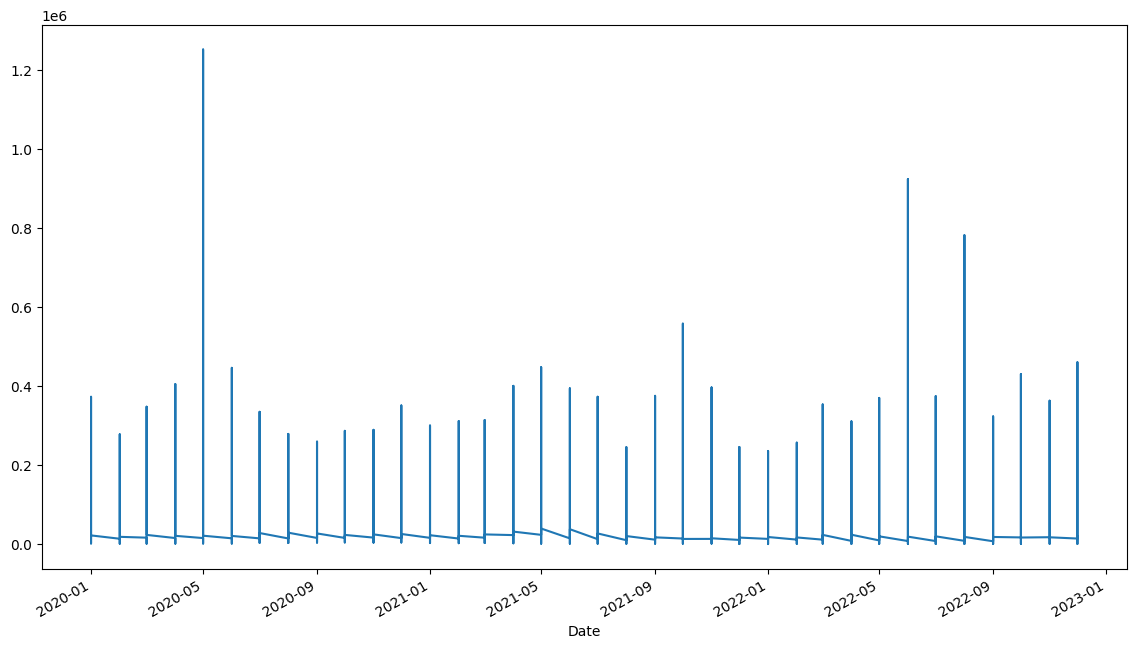

In [44]:
newdata["Level 4"].plot()

In [45]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(newdata['Level 4'])

1. ADF :  -10.078331696590032
2. P-Value :  1.2070774227037553e-17
3. Num Of Lags :  26
4. Num Of Observations Used For ADF Regression: 2133
5. Critical Values :
	 1% :  -3.433419473570619
	 5% :  -2.862895974588963
	 10% :  -2.5674918550982277


In [46]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(newdata['Level 4'], trace=True,
suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=55000.885, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=55240.425, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55040.488, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55039.370, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=56069.593, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=55032.680, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=55038.799, Time=0.22 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=55002.386, Time=0.52 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=55002.855, Time=0.47 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=55038.590, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=55020.234, Time=0.29 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=55036.272, Time=0.33 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=54831.826, Time=2.26 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=54994.410, Time=1.02 sec
 ARIMA(3,0,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2160
Model:               SARIMAX(3, 0, 3)   Log Likelihood              -27407.913
Date:                Wed, 30 Nov 2022   AIC                          54831.826
Time:                        20:18:12   BIC                          54877.249
Sample:                             0   HQIC                         54848.440
                               - 2160                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.651e+04   9333.628      4.983      0.000    2.82e+04    6.48e+04
ar.L1         -0.9363      0.031    -30.458      0.000      -0.997      -0.876
ar.L2          0.0990      0.047      2.098      0.036       0.007       0.192
ar.L3          0.6647      0.029     23.213      0.000       0.609       0.721
ma.L1          1.3506      0.033     41.233      0.000       1.286       1.415
ma.L2          0.4981      0.055      9.048      0.000       0.390       0.606
ma.L3         -0.2829      0.033     -8.595      0.000      -0.347      -0.218
sigma2      6.745e+09      0.496   1.36e+10      0.000    6.75e+09    6.75e+09
===================================================================================
Ljung-Box (L1) (Q):                   8.27   Jarque-Bera (JB):             53920.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             2.94
Prob(H) (two-sided):                  0.68   Kurtosis:                        26.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.14e+24. Standard errors may be unstable.
"""

In [47]:
print(newdata.shape)
train=newdata.iloc[:-500]
test=newdata.iloc[-500:]
print(train.shape,test.shape)

(2160, 1)
(1660, 1) (500, 1)


In [48]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Level 4'],order=(3,0,3))
model=model.fit()
model.summary()

c:\Users\vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Level 4   No. Observations:                 1660
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -20963.512
Date:                Wed, 30 Nov 2022   AIC                          41943.024
Time:                        20:18:13   BIC                          41986.341
Sample:                             0   HQIC                         41959.079
                               - 1660                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.844e+04   3576.754     16.339      0.000    5.14e+04    6.55e+04
ar.L1         -1.0111      0.029    -35.006      0.000      -1.068      -0.954
ar.L2         -0.8933      0.040    -22.351      0.000      -0.972      -0.815
ar.L3         -0.1593      0.034     -4.619      0.000      -0.227      -0.092
ma.L1          1.4533      0.027     54.059      0.000       1.401       1.506
ma.L2          1.4219      0.034     42.150      0.000       1.356       1.488
ma.L3          0.6764      0.029     22.995      0.000       0.619       0.734
sigma2       5.84e+09      0.086   6.79e+10      0.000    5.84e+09    5.84e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             34176.39
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                             3.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.47e+25. Standard errors may be unstable.
"""

In [49]:
pred_ARIMA = model.forecast(len(test))
pred_ARIMA = np.exp(pred_ARIMA)-1
pred_ARIMA

c:\Users\vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


1660    inf
1661    inf
1662    inf
1663    inf
1664    inf
       ... 
2155    inf
2156    inf
2157    inf
2158    inf
2159    inf
Name: predicted_mean, Length: 500, dtype: float64

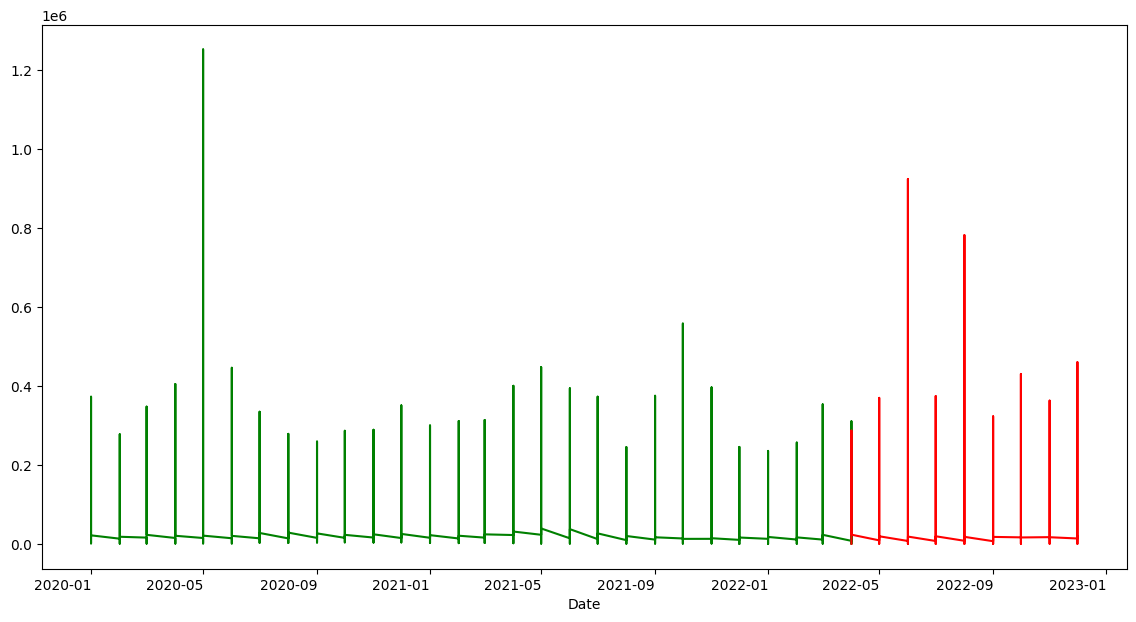

In [50]:
train['Level 4'].plot(label = 'train',color='green')
test['Level 4'].plot(label = 'test', color = 'red')
pred_ARIMA.plot(label = 'ARIMA(2,1,1)',color='blue');

In [51]:
pred_ARIMA.info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 1660 to 2159
Series name: predicted_mean
Non-Null Count  Dtype  
--------------  -----  
500 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


# srima model

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [53]:
sarima_model = SARIMAX(train,
                      order = (3,0,3),
                      seasonal_order=(1,1,1,12))

c:\Users\vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [54]:
sarima_result = sarima_model.fit()

c:\Users\vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
sarima_forecast = sarima_result.get_forecast(steps= len(test))

c:\Users\vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [56]:
sarima_forecast

In [57]:
sarima_forecast = sarima_forecast.summary_frame()
sarima_forecast.head()

Level 4,mean,mean_se,mean_ci_lower,mean_ci_upper
1660,44810.921384,108064.803580,-166992.201629,256614.044397
1661,105000.093670,127200.317386,-144307.947229,354308.134570
1662,87212.572061,127518.704826,-162719.496755,337144.640876
1663,63670.880095,127518.743225,-186261.263980,313603.024171
1664,29119.184871,127525.642909,-220826.482336,279064.852077


In [58]:
pred_SARIMA = np.exp(sarima_forecast['mean'])-1

c:\Users\vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [59]:
pred_SARIMA[:10]

C:\Users\vikas\AppData\Local\Temp\ipykernel_6764\2833649745.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pred_SARIMA[:10]


1660    inf
1661    inf
1662    inf
1663    inf
1664    inf
1665    inf
1666    inf
1667    inf
1668    inf
1669    inf
Name: mean, dtype: float64

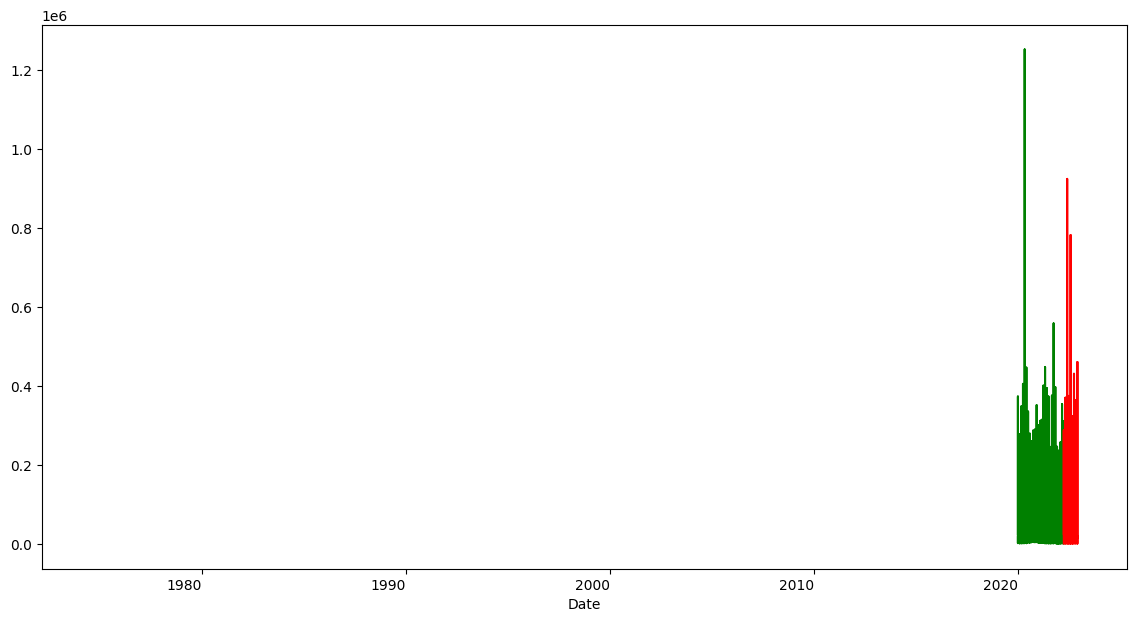

In [60]:
train['Level 4'].plot(label = 'train',color='green')
test['Level 4'].plot(label = 'test', color = 'red')
pred_SARIMA.plot(label = 'SARIMA(2,1,1)(1,1,1,12)',color='blue');

#  
<!-- Part 5: Visualization -->


# Part 5: Visualization

Part 5: Visualization
1.A line graph for “Level 1” for the different “Laptop/Desktop” over the months of the year 2020 & 2021. 
 (Hint : On x axis there should be months from jan- 2020 to dec- 2021 and Y axis should be the sum of “Level 1” and there should be different lines depicting different devices used.)

In [61]:
data

,Year,Month,Date,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178
1,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916
2,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461
3,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Indore,783870.222017,358215.416281,320923,110667
4,2020,1,2020-01-01,Desktop_Website,Existing_Customer,LinkedIn,Pune,783870.222017,358215.416281,220937,46033
...,...,...,...,...,...,...,...,...,...,...,...
2155,2022,12,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Bengaluru,67299.000000,21255.000000,6984,1882
2156,2022,12,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Hyderabad,430294.000000,156510.000000,46676,16703
2157,2022,12,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Dehradun,48713.000000,27770.000000,7515,2089
2158,2022,12,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Indore,593021.000000,310836.000000,161575,78465


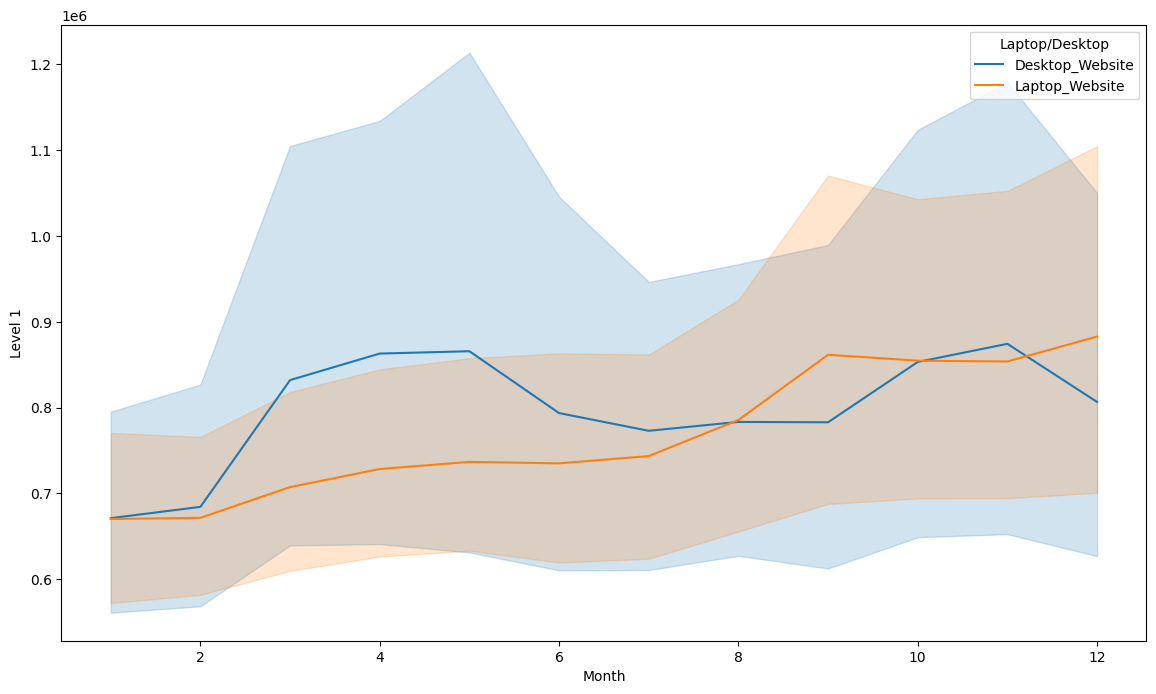

In [62]:
sns.lineplot( x = "Month",
             y = "Level 1",
             hue = "Laptop/Desktop",
             data = data);

2.A line graph for “Level 2” for the different “Coming from” over the months of the year 2021 & 2022.

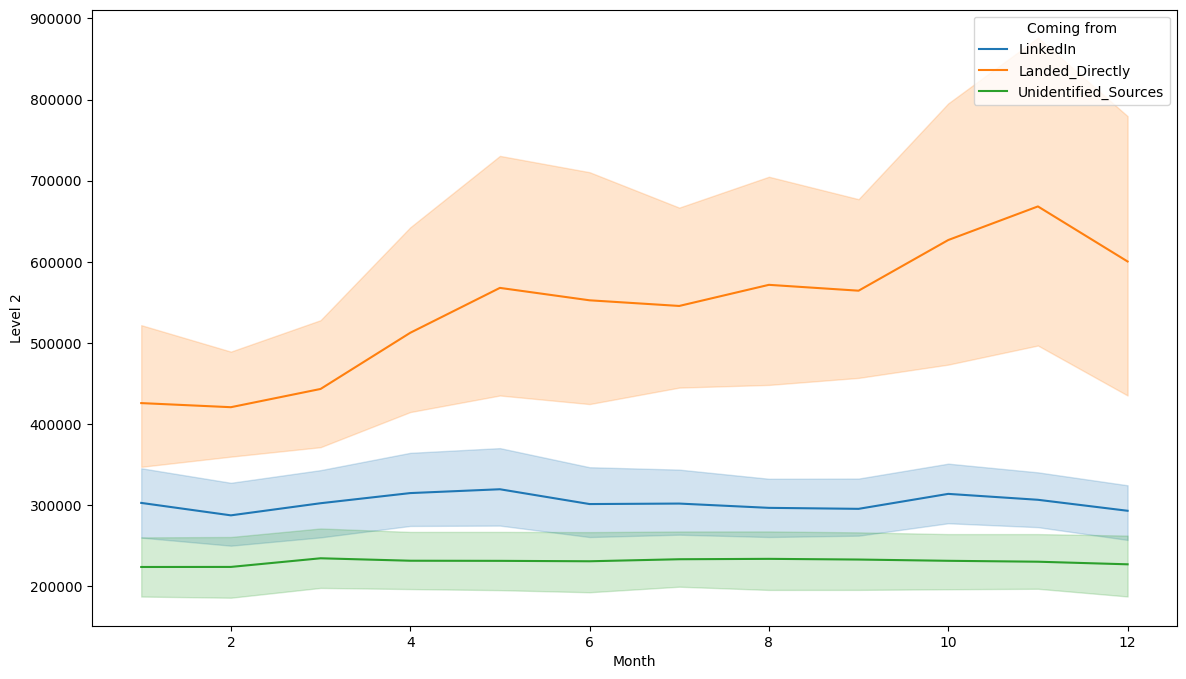

In [63]:
sns.lineplot( x = "Month",
             y = "Level 2",
             hue = "Coming from",
             data = data);

3.A line graph for “Level 1” and “Level 2” over the months of the year 2020, 2021 & 2022.

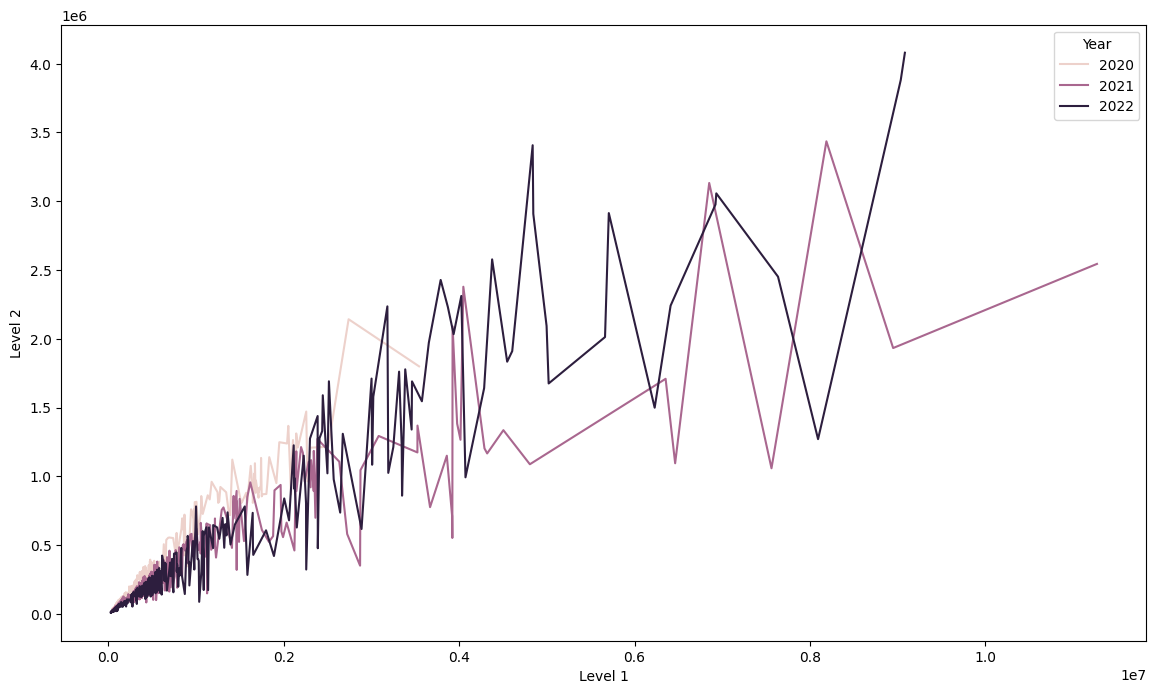

In [64]:
sns.lineplot( x = "Level 1",
             y = "Level 2",
             hue = "Year",
             
             data = data);

# Part 6: About the Previous projects

i have so many project and currently working on some projects . some of tham
1. Google playstore ( uploaded on github )
>>problem statement : Google Play Store team is about to launch a new feature wherein, certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility. This feature will help bring more attention to newer apps that have the potential. The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, are always great indicators of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

2. Book recommandation system ( uploaded on github )

>>>>Book Rent is the largest online and offline book rental chain in India. They provide books of various genres, such as thrillers, mysteries, romances, and science fiction. The company charges a fixed rental fee for a book per month. Lately, the company has been losing its user base. The main reason for this is that users are not able to choose the right books for themselves. The company wants to solve this problem and increase its revenue and profit. 

Project Objective:

You, as an ML expert, should focus on improving the user experience by personalizing it to the user's needs. You have to model a recommendation engine so that users get recommendations for books based on the behavior of similar users. This will ensure that users are renting the books based on their tastes and traits.

3. Comcast Telecom Consumer Complaints ( uploaded on github  )

>>Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints. The existing database will serve as a repository of public customer complaints filed against Comcast. It will help to pin down what is wrong with Comcast's customer service.

TASK PERFORMED :
Import data into Python environment.
Provide the trend chart for the number of complaints at monthly and daily granularity levels.
Provide a table with the frequency of complaint types.
Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
Which state has the maximum complaints Which state has the highest percentage of unresolved complaints

Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls



GitHub :  https://github.com/ervikashgoyal


Linkdin :  https://www.linkedin.com/in/vikash-goyal-20692924b

# Part 7: Time management

 I do not have any experience with managing time in work yet. But I’ve never been a time waster, and I am not a kind of guy who enjoys lying in a bed all day, doing nothing. I am pretty active, and I have proactive approach to everything I do. I would love to transfer this attitude also to my work. However, I must first understand what exactly you will expect from me here, and then I should be able to plan my day in  in a meaningful way.



# ---------------------Thank You--------------------